In [1]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
raw_data = pd.read_csv("fetal_health.csv",
                      dtype={'fetal_health':np.int32})

raw_data = raw_data.rename(columns={
    'baseline value':'baseline', 'accelerations':'accel', 'fetal_movement':'mov',
    'uterine_contractions':'u_contr', 
    'light_decelerations':'decel_lght', 'severe_decelerations':'decel_sevr', 
    'prolongued_decelerations':'decel_prlng', 'abnormal_short_term_variability':'ab_stv',
    'mean_value_of_short_term_variability':'mean_stv',
    'percentage_of_time_with_abnormal_long_term_variability':'ab_stv_time',
    'mean_value_of_long_term_variability':'mean_ltv', 
    'histogram_width':'hist_w', 'histogram_min':'hist_min', 'histogram_max':'hist_max', 
    'histogram_number_of_peaks':'hist_npeaks', 'histogram_number_of_zeroes':'hist_nzeroes', 
    'histogram_mode':'hist_mode', 'histogram_mean':'hist_mean', 'histogram_median':'hist_median', 
    'histogram_variance':'hist_var', 'histogram_tendency':'hist_tend',
    'fetal_health':'fetal_health'
})
raw_data.head() # show first bit of data

,baseline,accel,mov,u_contr,decel_lght,decel_sevr,decel_prlng,ab_stv,mean_stv,ab_stv_time,...,hist_min,hist_max,hist_npeaks,hist_nzeroes,hist_mode,hist_mean,hist_median,hist_var,hist_tend,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1


# Separate target variable and feature selection

In [3]:
x = raw_data.loc[:, raw_data.columns!='fetal_health'] # select all the columns except fetal_health
y = raw_data["fetal_health"]            # target featla_health
# x is our features and y is our target variable

## Splitting the dataset into train test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
#shape of the training and test set
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1700, 21) (1700,)
(426, 21) (426,)


In [5]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter=500)

clf.fit(x_train, y_train)
nn_predict=clf.predict(x_test)

## Making the confusion matrix (Solver='lbfgs')

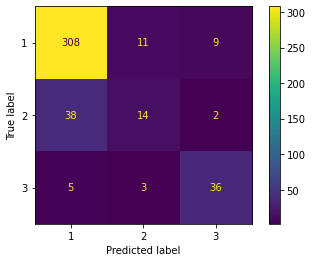

In [6]:
nn_confusion_matrix_lbfgs = confusion_matrix(y_test,nn_predict)
ConfusionMatrixDisplay(confusion_matrix = nn_confusion_matrix_lbfgs, display_labels = clf.classes_).plot()
plt.show()

## Performance Evaluation

In [7]:
print("Precision: {:.2f}%".format(precision_score(y_test, nn_predict,average="micro")*100))
print("Recall: {:.2f}%".format(recall_score(y_test, nn_predict,average="micro")*100))
print("Precision: {:.2f}%".format(f1_score(y_test, nn_predict,average="micro")*100))

print('\nClassification Report: \n')
print(classification_report(y_test, nn_predict, target_names=["1.0","2.0","3.0"]))

Precision: 84.04%
Recall: 84.04%
Precision: 84.04%

Classification Report: 

              precision    recall  f1-score   support

         1.0       0.88      0.94      0.91       328
         2.0       0.50      0.26      0.34        54
         3.0       0.77      0.82      0.79        44

    accuracy                           0.84       426
   macro avg       0.71      0.67      0.68       426
weighted avg       0.82      0.84      0.82       426



## Try Neural Network(NN) with differnt solver

### When the solver = sgd ( stochastic gradient descent) 

In [8]:
clf_sgd = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter=500)

clf_sgd.fit(x_train, y_train)
nn_predict_sgd=clf_sgd.predict(x_test)

## Making Confusion Matrix(solver=sgd)

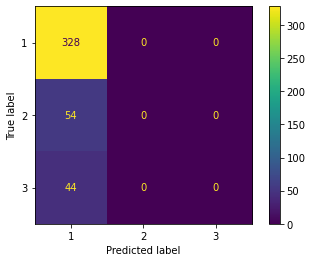

In [9]:
nn_confusion_matrix_sgd = confusion_matrix(y_test,nn_predict_sgd)
ConfusionMatrixDisplay(confusion_matrix = nn_confusion_matrix_sgd, display_labels = clf_sgd.classes_).plot()
plt.show()

### Performance Evaluation while solver is sgd

In [10]:
print("Precision: {:.2f}%".format(precision_score(y_test, nn_predict_sgd,average="micro")*100))
print("Recall: {:.2f}%".format(recall_score(y_test, nn_predict_sgd,average="micro")*100))
print("Precision: {:.2f}%".format(f1_score(y_test, nn_predict_sgd,average="micro")*100))

print('\nClassification Report: \n')
print(classification_report(y_test, nn_predict_sgd, target_names=["1.0","2.0","3.0"]))

Precision: 77.00%
Recall: 77.00%
Precision: 77.00%

Classification Report: 

              precision    recall  f1-score   support

         1.0       0.77      1.00      0.87       328
         2.0       0.00      0.00      0.00        54
         3.0       0.00      0.00      0.00        44

    accuracy                           0.77       426
   macro avg       0.26      0.33      0.29       426
weighted avg       0.59      0.77      0.67       426



### When the solver = adam (stochastic gradient based optimizer)

In [11]:
clf_adam = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter=500)

clf_adam.fit(x_train, y_train)
nn_predict_adam=clf_adam.predict(x_test)

## Making confusion Matrix (Solver=adam)

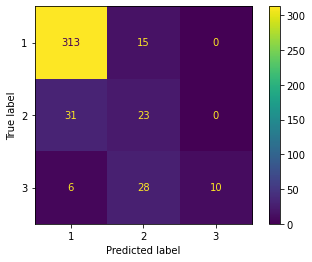

In [12]:
nn_confusion_matrix_adam = confusion_matrix(y_test,nn_predict_adam)
ConfusionMatrixDisplay(confusion_matrix = nn_confusion_matrix_adam, display_labels = clf_adam.classes_).plot()
plt.show()

### Performance Evaluation while solver is adam

In [13]:
print("Precision: {:.2f}%".format(precision_score(y_test, nn_predict_adam,average="micro")*100))
print("Recall: {:.2f}%".format(recall_score(y_test, nn_predict_adam,average="micro")*100))
print("Precision: {:.2f}%".format(f1_score(y_test, nn_predict_adam,average="micro")*100))

print('\nClassification Report: \n')
print(classification_report(y_test, nn_predict_adam, target_names=["1.0","2.0","3.0"]))

Precision: 81.22%
Recall: 81.22%
Precision: 81.22%

Classification Report: 

              precision    recall  f1-score   support

         1.0       0.89      0.95      0.92       328
         2.0       0.35      0.43      0.38        54
         3.0       1.00      0.23      0.37        44

    accuracy                           0.81       426
   macro avg       0.75      0.54      0.56       426
weighted avg       0.84      0.81      0.80       426



## Suppor Vector Classifier

#### We will use grid search to find the best hyperparameters for the model, the descision_function_shape is set to "ovr" which is "one versus rest" and probability to True in order to obtain the probablity that every instance belongs to each class

In [14]:
model_svm = SVC(kernel='rbf',decision_function_shape='ovr',probability=True)
tune_parameter = {'gamma':[0.01,0.1,1,10],'C':[0.01,0.1,1,10]}

svm_model = GridSearchCV(model_svm,tune_parameter,cv=4,scoring='accuracy')
svm_model_fit=svm_model.fit(x_train,y_train)

### printing the best estimators found by grid search

In [15]:
print(svm_model.best_estimator_)

SVC(C=10, gamma=0.01, probability=True)


### Now building the model using the above hyperparameters

In [16]:
svc_ovr = SVC(kernel='rbf',C=10,gamma=0.01,decision_function_shape='ovr',probability=True)
svc_ovr.fit(x_train,y_train)
svc_ovr_predict = svc_ovr.predict(x_test)

## Making Confusion Matrix (SVM)

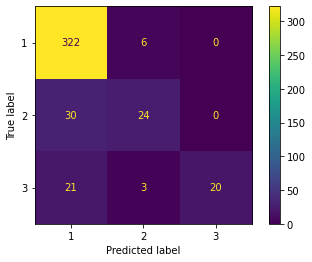

In [17]:
svc_ovr_confusion_matrix = confusion_matrix(y_test,svc_ovr_predict)
ConfusionMatrixDisplay(confusion_matrix = svc_ovr_confusion_matrix, display_labels = svc_ovr.classes_).plot()
plt.show()

### Performance Evaluation for Support Vector Classifier

In [18]:
print("Precision: {:.2f}%".format(precision_score(y_test, svc_ovr_predict,average="micro")*100))
print("Recall: {:.2f}%".format(recall_score(y_test,svc_ovr_predict,average="micro")*100))
print("Precision: {:.2f}%".format(f1_score(y_test,svc_ovr_predict,average="micro")*100))

print('\nClassification Report: \n')
print(classification_report(y_test, svc_ovr_predict, target_names=["1.0","2.0","3.0"]))

Precision: 85.92%
Recall: 85.92%
Precision: 85.92%

Classification Report: 

              precision    recall  f1-score   support

         1.0       0.86      0.98      0.92       328
         2.0       0.73      0.44      0.55        54
         3.0       1.00      0.45      0.62        44

    accuracy                           0.86       426
   macro avg       0.86      0.63      0.70       426
weighted avg       0.86      0.86      0.84       426

